# 1. Read the dataset to the python environment.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<font color='blue'>The data set is about 3 species of iris flower.features sepal length,sepal width, petal length ,petal width are used to classify the flower into each category
    1.The data set has 5 columns and 150 observations
    2.There are null values in SL,SW and PL columns

# 2. Do necessary pre-processing steps.

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

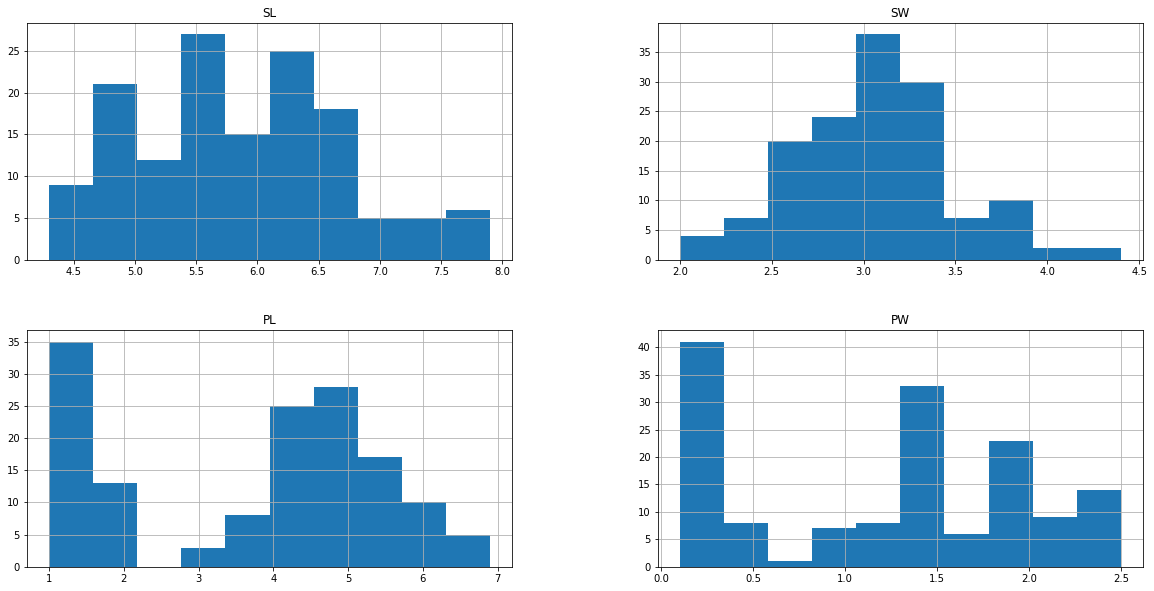

In [12]:
# We need to handle missing values. plotting graph to identify the skewness of data
plot=data.select_dtypes('float')
plot.hist(figsize=(20,10))
plt.show()

We will substitute missing values with median value

In [13]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#substituting median value for missing data
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [15]:
# checking for null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
# all null values has been handled by using median

<AxesSubplot:>

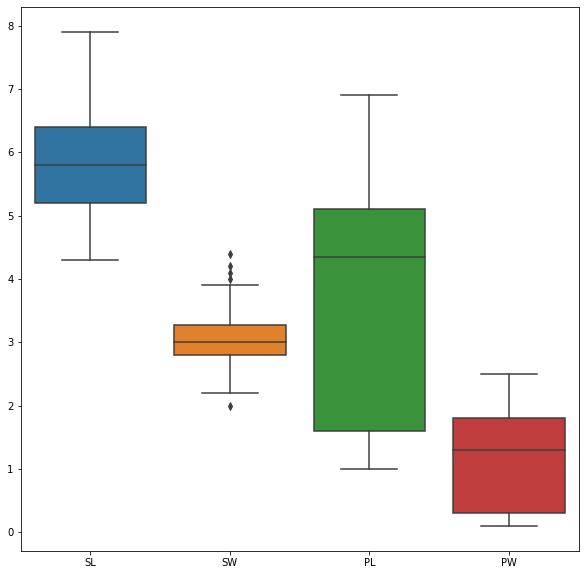

In [18]:
#checking for outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=data)

As per boxplot feature SW has outliers and need to be handled

In [20]:
# handling outlier in column SW
Q1=np.percentile(data['SW'],25)
Q3=np.percentile(data['SW'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 2.8
Quartile 3: 3.275
Inter Quartile Range(IQR): 0.4750000000000001
Lower Limit: 2.0874999999999995
Upper Limit: 3.9875


In [21]:
#outlier data
data[(data['SW']<LL) | (data['SW']>UL)]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [22]:
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Since there are equal no of data points for each species and to avoid bias in model we will fit the extreme values to upper limit and lower limit of the feature

In [24]:
# Age less than lower limit fitted to lower limit
data[(data['SW']<LL)]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [26]:
index=data.loc[(data['SW']<LL)].index
index

Int64Index([60], dtype='int64')

In [27]:
data.loc[index,'SW']=LL

In [28]:
#checking for data point <LL
data[(data['SW']<LL)]

,SL,SW,PL,PW,Classification


In [30]:
# Age greater than upper limit fitted to upper limit
data[(data['SW']>UL)]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [31]:
index=data.loc[(data['SW']>UL)].index
index

Int64Index([14, 15, 32, 33], dtype='int64')

In [32]:
data.loc[index,'SW']=UL

In [33]:
#checking for data point >UL
data[(data['SW']>UL)]

,SL,SW,PL,PW,Classification


<AxesSubplot:>

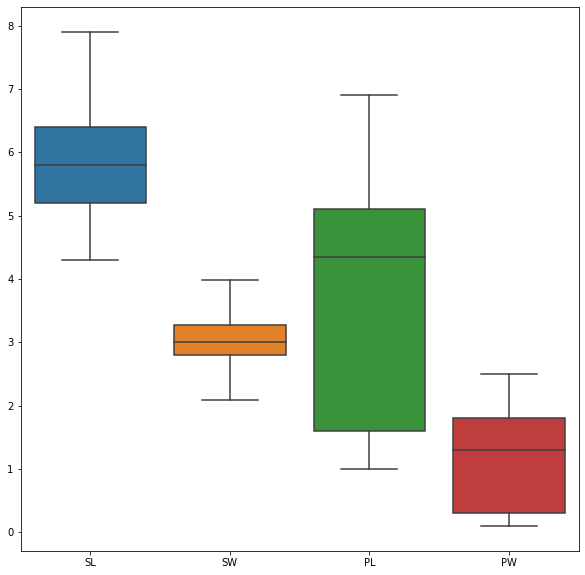

In [34]:
#Checking Box plot again for outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=data)

In [35]:
# All outliers have been handled

<AxesSubplot:>

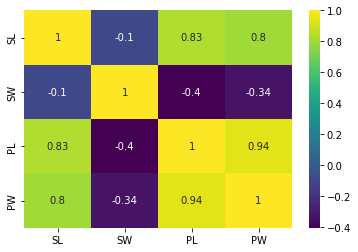

In [41]:
#checking correlation of data
sns.heatmap(data.corr(),annot=True,cmap='viridis')

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [ ]:
#Splitting data into train and test

In [43]:
X= data.drop(['Classification'],axis=1)
y=data['Classification']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [44]:
#importing classification models
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Using logistic regression

In [42]:
#creating an instance of Logistic regression
log_model=LogisticRegression()

In [46]:
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [50]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))

Confusion Matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [51]:
print(' Classification Report\n',classification_report(y_test,y_pred))

 Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
#logistic regression is giving 100% accuracy

# Using KNN

In [53]:
acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)

[0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'accuracy')

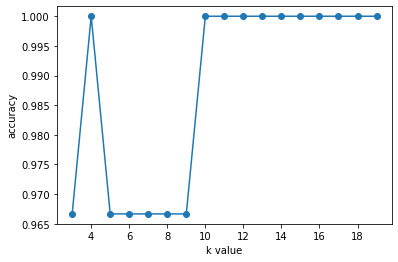

In [54]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [74]:
#Accuracy is same for 5,7,9 k values 96.67. So we will try with k=5
classifier= KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train) 
y_pred=classifier.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
 Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [56]:
# KNN regression is giving 97% accuracy

# Using SVN

In [58]:
# Linear Kernel
svm_linear=SVC(kernel='poly')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
 Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [59]:
#SVM linear is giving an 100% percent accuracy

In [60]:
# Polynomial Kernel
svm_poly=SVC(kernel='poly')
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
 Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [61]:
#SVM polynomial is giving an 97% percent accuracy

In [66]:
# RBF Kernel
svm_rbf=SVC(kernel='rbf',random_state=42)
svm_rbf.fit(X_train,y_train)
y_pred=svm_rbf.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
 Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [67]:
#SVM RBF is giving 100% accuracy

# Decision Tree

In [68]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
 Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [69]:
#Decision Tree is giving 100 percent accuracy

# Random Forests

In [70]:
rf_mod = RandomForestClassifier(random_state=42)
rf_mod.fit(X_train,y_train)
y_pred=rf_mod.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
 Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [71]:
#Random forest is giving 100% accuracy

As per anlaysis Logistic regression, SVM linear,SVM RBF, Decision Tree and random Forest are giving 100% accuracy